In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(r"C:\Users\NandhaKishore\Desktop\Project\DATA_SETS\world_development_clustering_dataset.csv")
df.head()

,country_id,gdp_per_capita,life_expectancy,child_mortality,health_expenditure_percent,education_index,unemployment_rate,internet_usage_percent,co2_emissions
0,1,20960.569836,83.194843,13.068512,7.719383,0.800138,7.837880,98.000000,3.636282
1,2,13340.828386,79.397069,1.707235,1.000000,0.907617,3.061864,80.576414,5.235116
2,3,22772.262457,72.477043,10.724250,4.921111,0.890981,6.976181,96.088538,3.690144
3,4,33276.358277,66.824506,2.941398,6.903322,0.832756,10.136011,64.778197,0.100000
4,5,12190.159503,77.585787,41.287143,6.551504,0.877324,6.246955,84.187746,9.282534


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_id                  1000 non-null   int64  
 1   gdp_per_capita              1000 non-null   float64
 2   life_expectancy             1000 non-null   float64
 3   child_mortality             1000 non-null   float64
 4   health_expenditure_percent  1000 non-null   float64
 5   education_index             1000 non-null   float64
 6   unemployment_rate           1000 non-null   float64
 7   internet_usage_percent      1000 non-null   float64
 8   co2_emissions               1000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB
None
        country_id  gdp_per_capita  life_expectancy  child_mortality  \
count  1000.000000     1000.000000      1000.000000      1000.000000   
mean    500.500000    15771.763385        72.532664        24.697482

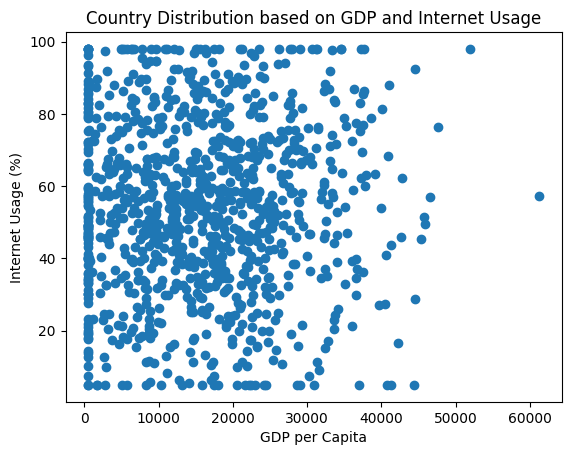

In [ ]:
plt.scatter(df['gdp_per_capita'], df['internet_usage_percent'])
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Usage (%)')
plt.title('Country Distribution based on GDP and Internet Usage')
plt.show()

In [ ]:
X = df[['gdp_per_capita', 'internet_usage_percent']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X

,gdp_per_capita,internet_usage_percent
0,20960.569836,98.000000
1,13340.828386,80.576414
2,22772.262457,96.088538
3,33276.358277,64.778197
4,12190.159503,84.187746
...,...,...
995,11626.796485,83.900167
996,36572.238322,39.787652
997,22690.114335,29.803302
998,8145.852123,61.343432


In [ ]:
X_scaled

array([[ 0.48000319,  1.84240196],
       [-0.22487957,  1.1139477 ],
       [ 0.64759823,  1.76248656],
       ...,
       [ 0.63999892, -1.00880069],
       [-0.70545351,  0.30984531],
       [ 0.56422414, -1.8295107 ]], shape=(1000, 2))

WCSS values: [1999.9999999999995, 1338.078806567691, 859.4944559177104, 651.4205627603999, 531.7733812137551, 450.53749859993445, 374.4513017682618, 334.2354687594408, 288.70196752283755, 255.38779046674736]


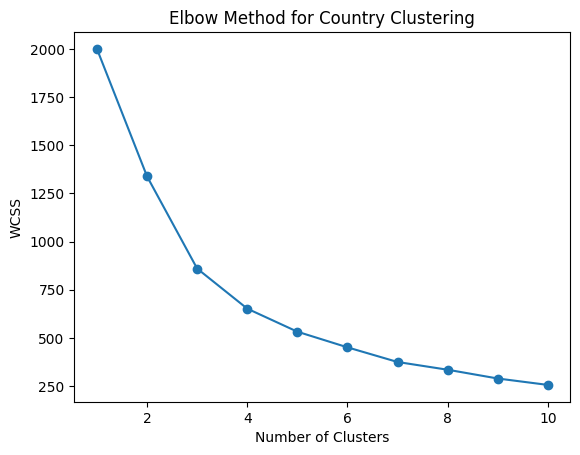

In [ ]:
wcss = []

# Try cluster numbers from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Print WCSS values
print("WCSS values:", wcss)

# Plot Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Country Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head(10)

,country_id,gdp_per_capita,life_expectancy,child_mortality,health_expenditure_percent,education_index,unemployment_rate,internet_usage_percent,co2_emissions,Cluster
0,1,20960.569836,83.194843,13.068512,7.719383,0.800138,7.837880,98.000000,3.636282,0
1,2,13340.828386,79.397069,1.707235,1.000000,0.907617,3.061864,80.576414,5.235116,4
2,3,22772.262457,72.477043,10.724250,4.921111,0.890981,6.976181,96.088538,3.690144,0
3,4,33276.358277,66.824506,2.941398,6.903322,0.832756,10.136011,64.778197,0.100000,0
4,5,12190.159503,77.585787,41.287143,6.551504,0.877324,6.246955,84.187746,9.282534,4
5,6,12190.356517,75.147883,73.763250,14.079101,0.429493,11.772452,36.900882,4.810614,3
6,7,33950.553786,79.161546,1.876616,7.049400,0.484720,11.086062,38.891493,8.793456,2
7,8,24209.216750,77.081374,77.591406,2.987836,0.487830,10.675659,5.000000,3.719891,2
8,9,9366.307369,80.396422,18.483789,5.713607,0.545085,5.161373,84.653637,1.859964,4
9,10,21510.720523,67.718118,8.901367,1.000000,0.555658,2.680630,93.508099,5.307543,0


In [ ]:
df

,country_id,gdp_per_capita,life_expectancy,child_mortality,health_expenditure_percent,education_index,unemployment_rate,internet_usage_percent,co2_emissions,Cluster
0,1,20960.569836,83.194843,13.068512,7.719383,0.800138,7.837880,98.000000,3.636282,0
1,2,13340.828386,79.397069,1.707235,1.000000,0.907617,3.061864,80.576414,5.235116,4
2,3,22772.262457,72.477043,10.724250,4.921111,0.890981,6.976181,96.088538,3.690144,0
3,4,33276.358277,66.824506,2.941398,6.903322,0.832756,10.136011,64.778197,0.100000,0
4,5,12190.159503,77.585787,41.287143,6.551504,0.877324,6.246955,84.187746,9.282534,4
...,...,...,...,...,...,...,...,...,...,...
995,996,11626.796485,80.561202,10.488282,4.762759,0.570505,1.000000,83.900167,0.302315,4
996,997,36572.238322,71.787830,49.998930,6.771597,0.408250,4.327428,39.787652,0.100000,2
997,998,22690.114335,64.945003,4.208257,5.278004,0.941015,7.773518,29.803302,4.407640,2
998,999,8145.852123,70.695464,2.159022,6.023641,0.833552,1.607292,61.343432,2.814210,4


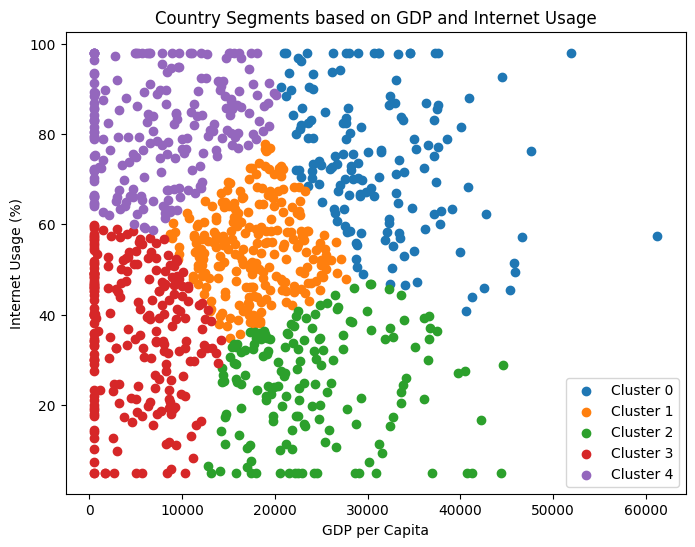

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Assuming 5 clusters (0 to 4)
for cluster in range(5):
    plt.scatter(
        df[df['Cluster'] == cluster]['gdp_per_capita'],
        df[df['Cluster'] == cluster]['internet_usage_percent'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('GDP per Capita')
plt.ylabel('Internet Usage (%)')
plt.title('Country Segments based on GDP and Internet Usage')
plt.legend()
plt.show()


In [ ]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model dumped Sucessfully")


Model dumped Sucessfully
